In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [1]:
sample_data = pd.read_csv('test.csv')

NameError: name 'pd' is not defined

In [56]:
sample_data

,filename,avg_distance,reason,num_oob_straight,num_oob_left,num_oob_right,total_seg,combination_of_seg,total_turn_angle,max_turn_angle,avg_turn_angle,num_of_oobs,max_distance
0,result-test-00.json,1.078638,goal_reached,1,1,1,3,9,210,120,70.0,3,12.489960
1,result-test-01.json,0.411236,goal_reached,1,0,0,1,1,0,0,0.0,1,2.475532
2,result-test-02.json,0.444288,goal_reached,0,1,0,1,3,45,45,45.0,1,2.642692
3,result-test-03.json,0.415280,goal_reached,0,0,1,1,5,60,60,60.0,1,2.211361
4,result-test-04.json,0.443116,goal_reached,0,1,1,2,8,150,90,75.0,2,2.280390
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,result-test-21.json,0.707489,goal_reached,0,0,3,3,5,75,75,25.0,3,5.004481
3997,result-test-22.json,0.653129,goal_reached,0,1,3,4,8,180,105,45.0,4,4.309410
3998,result-test-23.json,0.766865,goal_reached,0,2,3,5,8,180,105,36.0,5,7.157608
3999,result-test-24.json,0.984135,goal_reached,0,3,3,6,8,240,105,40.0,6,8.099509


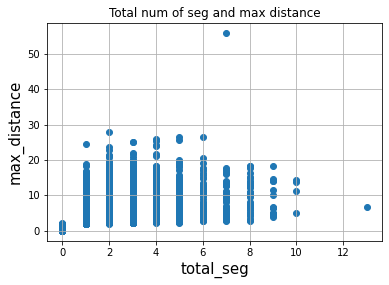

In [28]:
fig, ax = plt.subplots()
ax.scatter(sample_data['total_seg'], sample_data['max_distance'])

ax.set_xlabel(r'total_seg', fontsize=15)
ax.set_ylabel(r'max_distance', fontsize=15)
ax.set_title('Total num of seg and max distance')

ax.grid(True)
# fig.tight_layout()

plt.show()

In [49]:
grouped_by_seg_mean = sample_data.groupby('total_seg')['max_distance'].mean()
# grouped_by_seg_mean
grouped_by_seg_max = sample_data.groupby('total_seg')['max_distance'].max()
grouped_by_seg_count = sample_data.groupby('total_seg')['max_distance'].count()


# grouped_by_ = sample_data.groupby('total_seg')['max_distance'].mean()

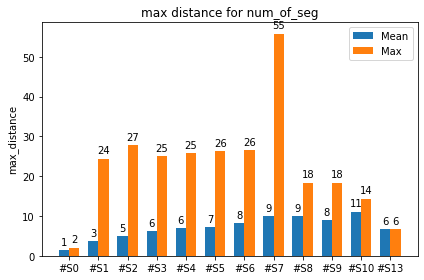

In [51]:
labels = ['#S0','#S1', '#S2', '#S3', '#S4', '#S5','#S6', '#S7', '#S8', '#S9', '#S10','#S13']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, grouped_by_seg_mean, width, label='Mean')
rects2 = ax.bar(x + width/2, grouped_by_seg_max, width, label='Max')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('max_distance')
ax.set_title('max distance for num_of_seg')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

plt.show()


In [59]:
grouped_by_comb_mean = sample_data.groupby('combination_of_seg')['max_distance'].mean()
grouped_by_comb_max = sample_data.groupby('combination_of_seg')['max_distance'].max()
grouped_by_comb_count = sample_data.groupby('combination_of_seg')['max_distance'].count()

In [60]:
grouped_by_comb_max

combination_of_seg
0     2.058136
1     5.102039
3    20.801715
4    24.981422
5    24.415478
6    19.752885
8    55.857597
9    25.783098
Name: max_distance, dtype: float64

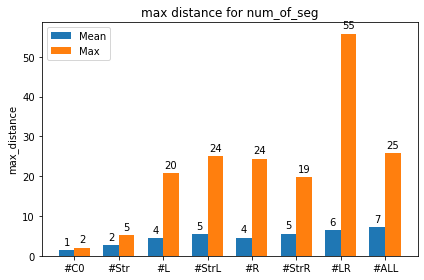

In [61]:
labels = ['#C0','#Str', '#L', '#StrL', '#R', '#StrR','#LR', '#ALL']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, grouped_by_comb_mean, width, label='Mean')
rects2 = ax.bar(x + width/2, grouped_by_comb_max, width, label='Max')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('max_distance')
ax.set_title('max distance for segment_combination')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

plt.show()